<a href="https://colab.research.google.com/github/Vigneswarsiddu/TASK6-VIGNESWARSIDDU/blob/main/TASK6_KAIBURR_SIDDU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: K. VIGNESWAR SIDDU

TASK - 6 ASSESSMENT - KAIBURR


In [78]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('/content/drive/MyDrive/complaints.csv')
df.shape

(4065103, 18)

In [79]:
df.head(2).T

,0,1
Date received,2023-09-04,2023-09-06
Product,"Money transfer, virtual currency, or money ser...",Debt collection
Sub-product,Mobile or digital wallet,Other debt
Issue,Trouble accessing funds in your mobile or digi...,Attempts to collect debt not owed
Sub-issue,NaN,Debt was result of identity theft
Consumer complaint narrative,NaN,NaN
Company public response,NaN,Company believes the complaint is the result o...
Company,"Paypal Holdings, Inc","CCS Financial Services, Inc."
State,NC,FL
ZIP code,27587,33032


In [80]:
df1 = df[['Product', 'Consumer complaint narrative']].copy()
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]
df1.columns = ['Product', 'Consumer_complaint']
df1.shape

(1472203, 2)

In [81]:
df1.head(15)

,Product,Consumer_complaint
149,Mortgage,On XX/XX/ I made a written request to have PMI...
157,Mortgage,This complaint relates to Select Portfolio Ser...
176,"Credit reporting, credit repair services, or o...",A couple years ago I became aware of identity ...
178,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting a...
378,"Credit reporting, credit repair services, or o...",Lexington law is what happened.\n\nThey dooped...
393,"Credit reporting, credit repair services, or o...","During the Covid pandemic, I fell victim to id..."
394,"Credit reporting, credit repair services, or o...",I paid off a {$1000.00} limit Credit card and ...
396,Debt collection,In accordance with the Fair Credit Reporting a...
401,"Credit reporting, credit repair services, or o...",Back in XX/XX/2021 AFTER COVID!! I ran my repo...
403,"Credit reporting, credit repair services, or o...","ALL REPORTED DATA MUST BE COMPLETE, CORRECT, A..."


In [82]:
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

36.2

In [83]:
pd.DataFrame(df.Product.unique()).values

array([['Money transfer, virtual currency, or money service'],
       ['Debt collection'],
       ['Checking or savings account'],
       ['Credit reporting or other personal consumer reports'],
       ['Mortgage'],
       ['Credit card'],
       ['Vehicle loan or lease'],
       ['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Student loan'],
       ['Payday loan, title loan, personal loan, or advance loan'],
       ['Credit card or prepaid card'],
       ['Consumer Loan'],
       ['Prepaid card'],
       ['Bank account or service'],
       ['Payday loan, title loan, or personal loan'],
       ['Debt or credit management'],
       ['Credit reporting'],
       ['Payday loan'],
       ['Money transfers'],
       ['Other financial service'],
       ['Virtual currency']], dtype=object)

In [84]:
df2 = df1.sample(10000, random_state=1).copy()

In [85]:
df2.replace({'Product':
             {'Credit reporting, credit repair services, or other personal consumer reports':
              'Credit reporting, repair, or other',
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}},
            inplace= True)

In [86]:
pd.DataFrame(df2.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Mortgage
2,Checking or savings account
3,Credit card or prepaid card
4,Debt collection
5,"Money transfer, virtual currency, or money ser..."
6,"Payday loan, title loan, or personal loan"
7,Student loan
8,Consumer Loan
9,Vehicle loan or lease


In [87]:
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

df2.head()

,Product,Consumer_complaint,category_id
337270,"Credit reporting, repair, or other",The date of my first letter was XXXX. I sent a...,0
814826,"Credit reporting, repair, or other",I was XXXX and my ID and social security card ...,0
1157572,"Credit reporting, repair, or other",I'm really not sure what happened. I have mail...,0
589205,Mortgage,I was impacted by hurricane Irma and then Mich...,1
2863449,Checking or savings account,I am a XXXX XXXX XXXX by trade. \n\nAt the en...,2


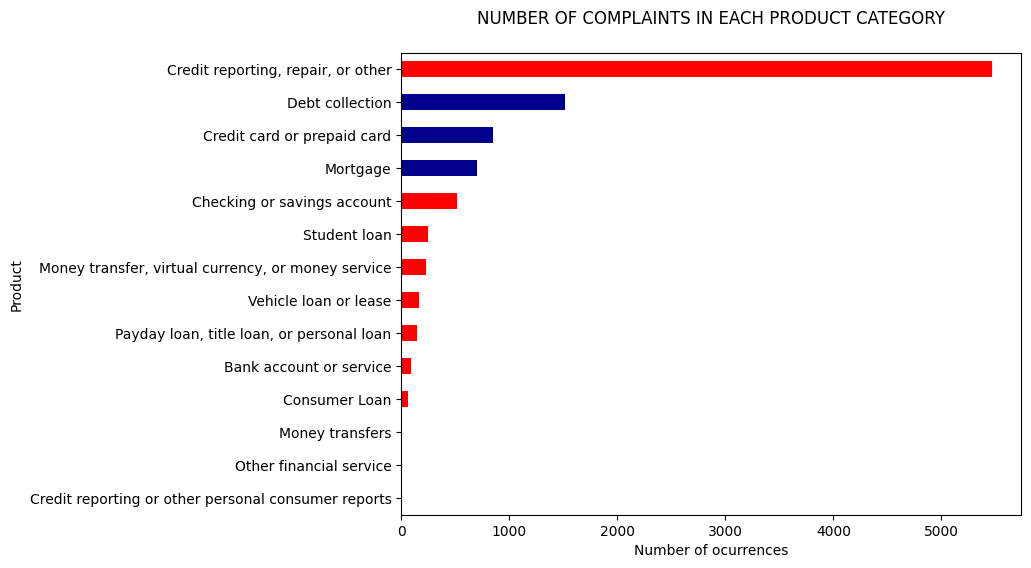

In [88]:
fig = plt.figure(figsize=(8,6))
colors = ['red','red','red','red','red','red','red','red','red',
    'red','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [89]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 26339 features (TF-IDF score of unigrams and bigrams)


In [90]:
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: cd, stocks, promotion
  * Most Correlated Bigrams are: checking account, xxxx 2015, posting xxxx

==> Checking or savings account:
  * Most Correlated Unigrams are: deposited, overdraft, bank
  * Most Correlated Bigrams are: overdraft fees, savings account, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: vehicle, car, motor
  * Most Correlated Bigrams are: title loan, chrysler capital, car car

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: express, amex, card
  * Most Correlated Bigrams are: use card, american express, credit card

==> Credit reporting or other personal consumer reports:
  * Most Correlated Unigrams are: usc, treat, 166b
  * Most Correlated Bigrams are: end consumer, late purpose, 166b creditor

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: 1681, section, reporting
  * Most Correlated Bigrams are: consumer reporting, 15 1681, 1681 sect

In [91]:
X = df2['Consumer_complaint']
y = df2['Product']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)

In [92]:
models = [LinearSVC(), MultinomialNB(),]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [93]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [94]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.8236,0.006941
MultinomialNB,0.6794,0.007154


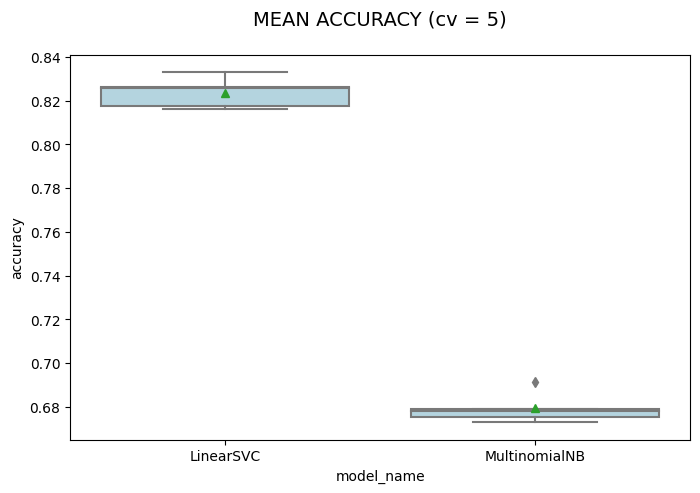

In [95]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [96]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,
                                                               labels,
                                                               df2.index, test_size=0.25,
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1386
           1       0.85      0.90      0.88       183
           2       0.65      0.78      0.71       128
           3       0.69      0.68      0.69       203
           4       0.72      0.71      0.71       368
           5       0.79      0.59      0.67        63
           6       0.57      0.12      0.21        32
           7       0.84      0.74      0.79        62
           8       0.00      0.00      0.00        17
           9       0.30      0.23      0.26        26
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.81      2500
   macro avg       0.48      0.44      0.45      2500
weighted avg       0.79      0.81      0.80      2500



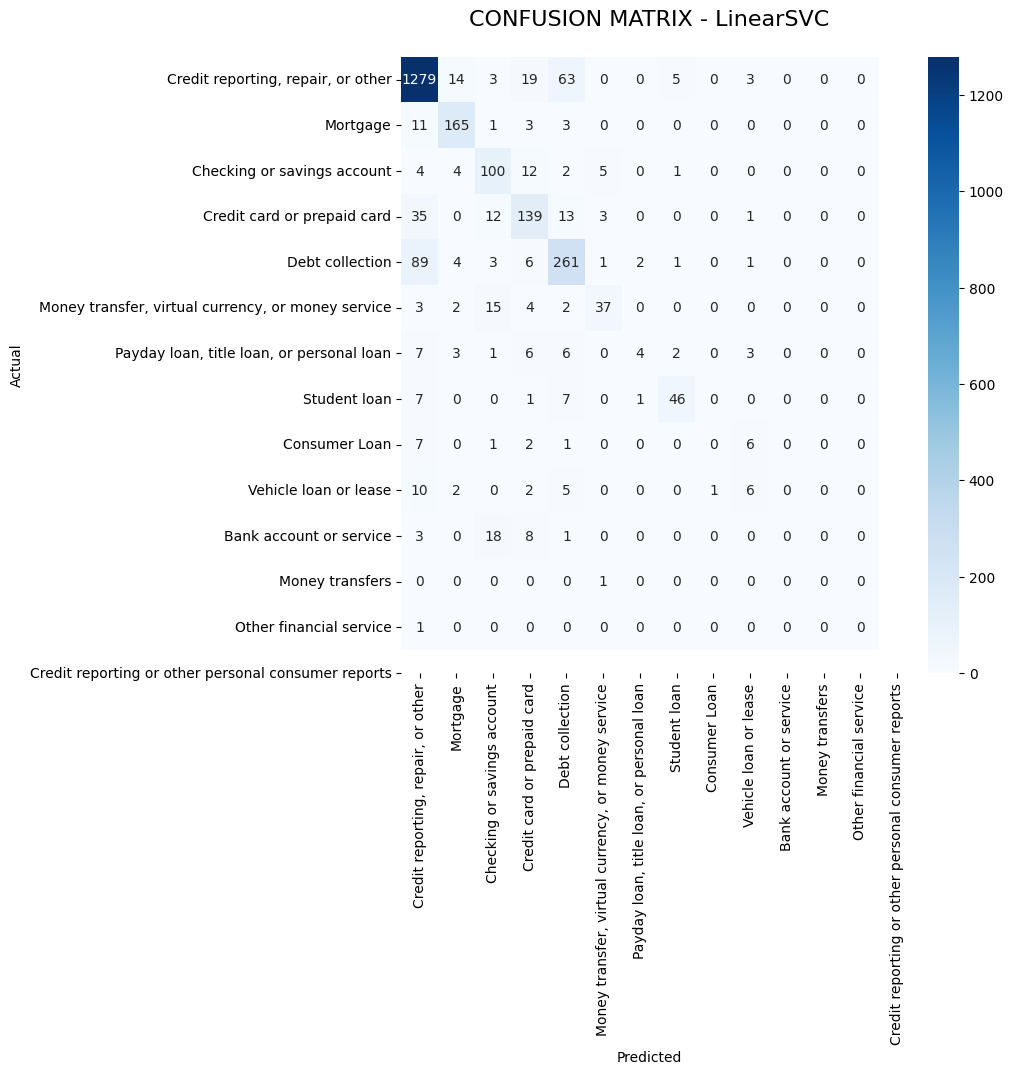

In [98]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values,
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [99]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("\n==> '{}':".format(Product))
  print("  * Top unigrams: %s" %(', '.join(unigrams)))
  print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'Bank account or service':
  * Top unigrams: bank, promotion, branch, 2016
  * Top bigrams: xxxx 2015, xx 2016, bank did, checking account

==> 'Checking or savings account':
  * Top unigrams: bank, savings, chime, checking
  * Top bigrams: debit card, savings account, 36 00, overdraft fees

==> 'Consumer Loan':
  * Top unigrams: car, motor, vehicle, acceptance
  * Top bigrams: xxxx 16, report owe, going pay, auto xxxx

==> 'Credit card or prepaid card':
  * Top unigrams: card, amex, purchase, capital
  * Top bigrams: american express, pay balance, missed payment, care credit

==> 'Credit reporting or other personal consumer reports':
  * Top unigrams: 166b, usc, 604, purpose
  * Top bigrams: 166b creditor, 15 usc, xxxx violated, late purpose

==> 'Credit reporting, repair, or other':
  * Top unigrams: equifax, experian, transunion, inquiries
  * Top bigrams: victim identity, xxxx xxxx, experian xxxx, late payments

==> 'Debt collection':
  * Top unigrams: debt, recovery, collecti

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)


In [101]:
new_complaint = """The date of my first letter was XXXX. I sent a letter regarding inaccurate and unknown things on my credit report. I want the erroneous, inaccurate, and incomplete items on my report to be deleted immediately. I assure you that it was in fact me who filed my complaint due to the negligence your company has shown in reference to my credit report and my complaint.. In fact if you do not honor my original request to delete the items contained in my previous letter, dated XX/XX/21 sent via certified mail, I will file a complaint with the Federal Trade Commission against your company as well as seek legal council for damages for the XXXX XXXX and emotional XXXX XXXXour company 's negligence in reference to this deformation to my reputation due to your false report. This is my 2nd and final attempt to get this matter resolved. Any further attempts will include additional complaints to the XXXX FTC as well as my States Attorney General 's Office. You have had more than 30 days to complete your investigation, and you have failed to respond with in that given amount of time. Be advised that the description of the procedure used to determine the accuracy and completeness of the information is hereby requested as well. I insist you finish your investigation immediately by deleting the items in question and sending me a free copy of my credit reporting showing the changes have been made."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Credit reporting, repair, or other']


In [102]:
print(df2['Consumer_complaint'] == new_complaint)
df2.head(1)

337270     False
814826     False
1157572    False
589205     False
2863449    False
           ...  
3409083    False
2756499    False
3392408    False
326256     False
1258628    False
Name: Consumer_complaint, Length: 10000, dtype: bool


,Product,Consumer_complaint,category_id
337270,"Credit reporting, repair, or other",The date of my first letter was XXXX. I sent a...,0
